In [8]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.special import ellipj 
from ipywidgets import interact 

In [175]:
#Configure the parameters 


def set_params(x_o, alpha, beta, phase): 
    
    return {'amplitude': x_o, 'alphaconstant' : alpha, 'damping_coefficient' : beta, 'phase': phase}




#params = @interact(params = set_params(0.1, 5, 0.05), params = set_params(0, 15, 0.1), params = set_params(0, 5, 0.1), params = set_params(0, 2*np.pi, 0.1))

params = set_params(0.99, 2, 0.2,np.pi/2)



t = np.linspace(0,50,500)



"""

def set_params(x_o, alpha, beta, theta):
    return {
        'amplitude': x_o,
        'alphaconstant': alpha,
        'damping_coefficient': beta,
        'angle': theta
    }

@interact(x_o=(0.0, 1.0, 0.1), alpha=(1, 15, 1), beta=(0.0, 0.1, 0.01), theta=(0, 2*np.pi, 0.1))
def params(x_o=0.1, alpha=5, beta=0.05, theta=0):
    p = set_params(x_o, alpha, beta, theta)
    print(p)
"""

"\n\ndef set_params(x_o, alpha, beta, theta):\n    return {\n        'amplitude': x_o,\n        'alphaconstant': alpha,\n        'damping_coefficient': beta,\n        'angle': theta\n    }\n\n@interact(x_o=(0.0, 1.0, 0.1), alpha=(1, 15, 1), beta=(0.0, 0.1, 0.01), theta=(0, 2*np.pi, 0.1))\ndef params(x_o=0.1, alpha=5, beta=0.05, theta=0):\n    p = set_params(x_o, alpha, beta, theta)\n    print(p)\n"

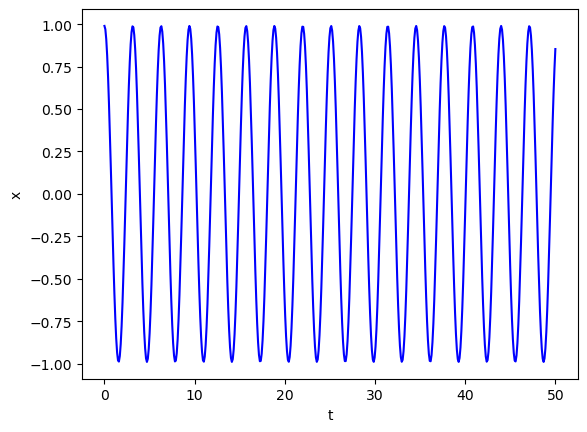

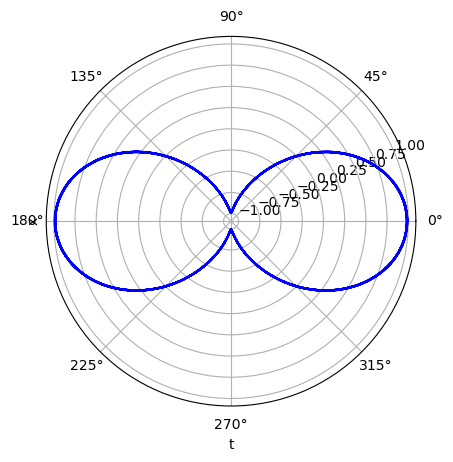

In [176]:


def x(params, t, k = 0, gamma =  0): 

    #defining parameters
    x_o = params['amplitude']
    alpha = params['alphaconstant']

    #equation
    omega = np.sqrt(2*alpha) - k*gamma
    theta = omega*t 
    return x_o* np.exp(1j*theta)


plt.plot(t,x(params,t), color="blue")
plt.xlabel('t'); plt.ylabel('x')
plt.show()


plt.polar(t,x(params,t), color="blue")
plt.xlabel('t'); plt.ylabel('x')
plt.show()


### Damping ODE for Small Angles

In [177]:
  
def x2(params, k= 0 , gamma= 0 ):

    #defining parameters
    x_o = params['amplitude']
    alpha = params['alphaconstant']
    beta = params['damping_coefficient']

    theta = (beta * 1j - np.sqrt(2*alpha - beta**2))*t - k*gamma


    return x_o*np.exp(1j*theta)

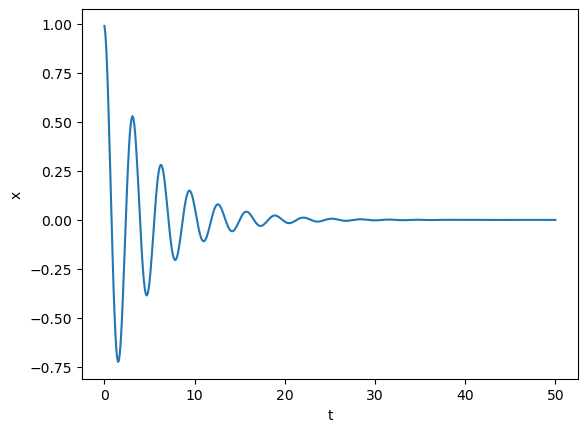

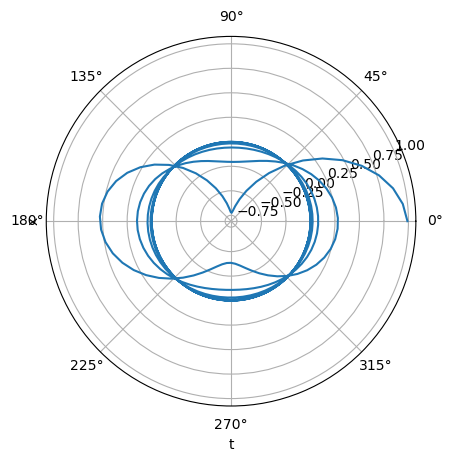

In [178]:
plt.plot(t,x2(params, t))
plt.xlabel('t')
plt.ylabel('x')

plt.show()



plt.polar(t,x2(params, t))
plt.xlabel('t')
plt.ylabel('x')
plt.show()


### First Elliptic Jacobi Function for wave 

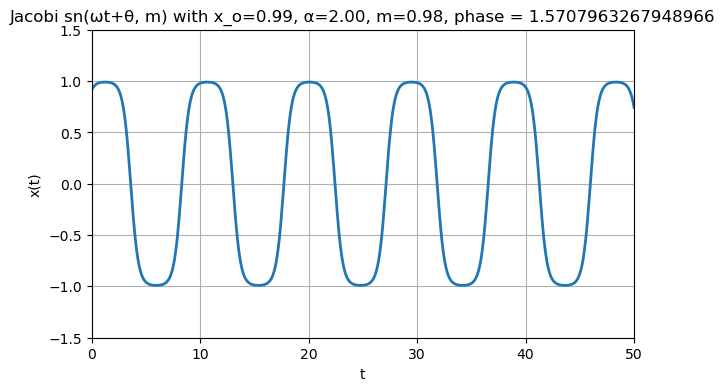

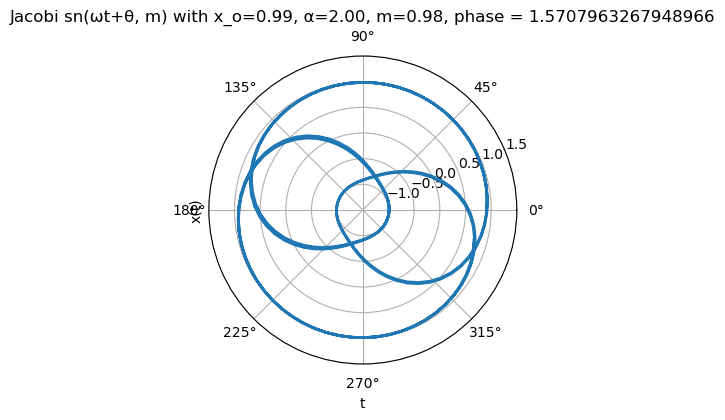

'\n#Defining the sn jacobi function:\n\ndef x_sn(t,omega_val,modulus_k, params): \n\n    #Defining the helper functions for wavefunction and modulus\n    \n\n    #Omega function\n    def omega(params): \n        x_o = params[\'amplitude\']\n        alpha = params[\'alphaconstant\']\n        return np.sqrt(alpha*(2-x_o**2)) \n\n    #Modulus function\n    def modulus(params): \n        x_o = params[\'amplitude\']\n        return np.sqrt(x_o**2/ (2-x_o**2)) \n\n    \n    phase = params[\'phase\']\n    omega_val = omega(params)\n    modulus_k = modulus(params)\n\n    #Defining the sn function \n\n    u = omega_val*t + phase \n    sn, cn, dn, ph = ellipj(u,modulus_k)\n    return x_o*sn\n\n#Plotting the elliptic function by definining the elliptic function \ndef plot_elliptic(params):\n    omega_val = x_sn(omega(params))\n    m = modulus(params)\n    \n   \n    return x_sn(t, omega_val, m, params)\n    \n\n\nplt.figure(figsize=(7, 4))\nplt.plot(t, x_sn, lw=2)\nplt.title(f"Jacobi sn(ωt+θ, m) 

In [179]:
# --- Helper functions ---

def omega(params):
    x_o = params['amplitude']
    alpha = params['alphaconstant']
    return np.sqrt(alpha * (2 - x_o**2))

def modulus(params):
    x_o = params['amplitude']
    return np.sqrt(x_o**2 / (2 - x_o**2))

# --- Jacobi sn function ---

def x_sn(t, params):
    x_o = params['amplitude']
    omega_val = omega(params)
    m = modulus(params)
    phase = params['phase']

    u = omega_val * t + phase
    sn, cn, dn, ph = ellipj(u, m)
    return x_o * sn

# --- Plotting function ---

def plot_elliptic(params):
    
    x3 = x_sn(t, params)

    plt.figure(figsize=(7, 4))
    plt.plot(t, x3, lw=2)
    plt.title(f"Jacobi sn(ωt+θ, m) with x_o={params['amplitude']:.2f}, α={params['alphaconstant']:.2f}, m={modulus(params):.2f}, phase = {params['phase']}")
    plt.xlabel("t")
    plt.ylabel("x(t)")
    plt.grid(True)
    plt.ylim(-1.5, 1.5)
    plt.xlim(0,50)
    plt.show()


plot_elliptic(params)

def plot_elliptic_polar(params): 
    
    x3_p = x_sn(t, params)

    plt.figure(figsize=(7, 4))
    plt.polar(t, x3_p, lw=2)
    plt.title(f"Jacobi sn(ωt+θ, m) with x_o={params['amplitude']:.2f}, α={params['alphaconstant']:.2f}, m={modulus(params):.2f}, phase = {params['phase']}")
    plt.xlabel("t")
    plt.ylabel("x(t)")
    plt.grid(True)
    plt.ylim(-1.5, 1.5)
    plt.show()
    


plot_elliptic_polar(params)
"""
#Defining the sn jacobi function:

def x_sn(t,omega_val,modulus_k, params): 

    #Defining the helper functions for wavefunction and modulus
    

    #Omega function
    def omega(params): 
        x_o = params['amplitude']
        alpha = params['alphaconstant']
        return np.sqrt(alpha*(2-x_o**2)) 

    #Modulus function
    def modulus(params): 
        x_o = params['amplitude']
        return np.sqrt(x_o**2/ (2-x_o**2)) 

    
    phase = params['phase']
    omega_val = omega(params)
    modulus_k = modulus(params)

    #Defining the sn function 

    u = omega_val*t + phase 
    sn, cn, dn, ph = ellipj(u,modulus_k)
    return x_o*sn

#Plotting the elliptic function by definining the elliptic function 
def plot_elliptic(params):
    omega_val = x_sn(omega(params))
    m = modulus(params)
    
   
    return x_sn(t, omega_val, m, params)
    


plt.figure(figsize=(7, 4))
plt.plot(t, x_sn, lw=2)
plt.title(f"Jacobi sn(ωt+θ, m) with A={A:.2f}, a={a:.2f}, m={m:.2f}")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.grid(True)
plt.ylim(-1.5, 1.5)
plt.show()


"""

### Second Elliptic Case 

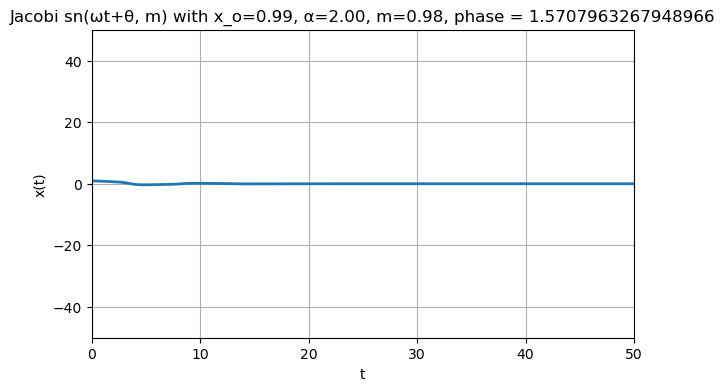

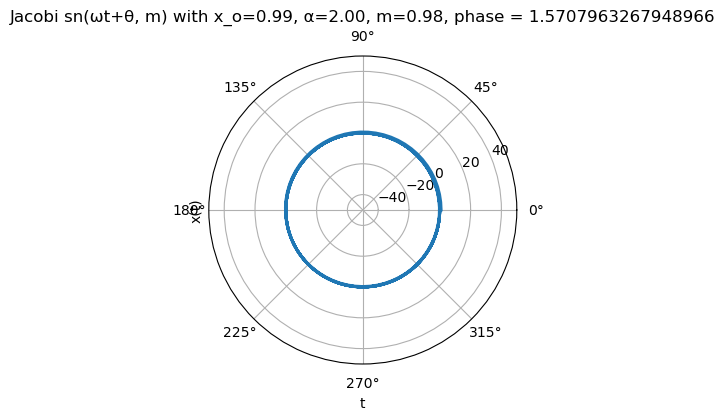

In [180]:
# --- Helper functions ---

def omega2(params):
    x_o = params['amplitude']
    alpha = params['alphaconstant']
    beta = params['damping_coefficient']
    phase = params['phase']
    return np.sqrt(2*alpha * (1+ x_o**2)- beta**2) + phase 

def modulus2(params):
    x_o = params['amplitude']
    alpha = params['alphaconstant']
    beta = params['damping_coefficient']
    return np.sqrt(alpha*x_o**2 / 2*alpha * (1+ x_o**2)- beta**2)

# --- Jacobi sn function ---

def x_sn2(t, params):
    x_o = params['amplitude']
    omega_val2 = omega(params)
    m = modulus(params)
    phase = params['phase']
    beta = params['damping_coefficient']

    u = omega_val2 * t + phase
    sn, cn, dn, ph = ellipj(u, m)
    return np.exp(-beta*t)*x_o * sn

# --- Plotting function ---

def plot_elliptic2(params):
    
    x4 = x_sn2(t, params)

    plt.figure(figsize=(7, 4))
    plt.plot(t, x4, lw=2)
    plt.title(f"Jacobi sn(ωt+θ, m) with x_o={params['amplitude']:.2f}, α={params['alphaconstant']:.2f}, m={modulus(params):.2f}, phase = {params['phase']}")
    plt.xlabel("t")
    plt.ylabel("x(t)")
    plt.grid(True)
    plt.ylim(-50, 50)
    plt.xlim(0,50)
    plt.show()


plot_elliptic2(params)

def plot_elliptic_polar2(params): 
    
    x4_p = x_sn2(t, params)

    plt.figure(figsize=(7, 4))
    plt.polar(t, x4_p, lw=2)
    plt.title(f"Jacobi sn(ωt+θ, m) with x_o={params['amplitude']:.2f}, α={params['alphaconstant']:.2f}, m={modulus(params):.2f}, phase = {params['phase']}")
    plt.xlabel("t")
    plt.ylabel("x(t)")
    plt.grid(True)
    plt.ylim(-50, 50)
    plt.show()


plot_elliptic_polar2(params)

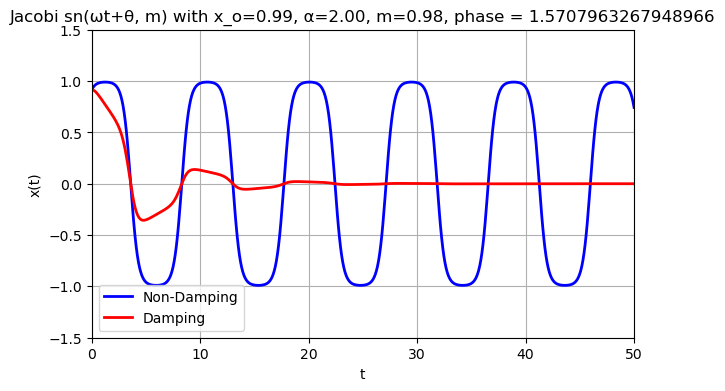

In [181]:
"""
plt.plot(t,x(params,t), color="blue")
plt.xlabel('t')
plt.ylabel('x')

plt.plot(t,x2(params, t))
plt.xlabel('t')
plt.ylabel('x')

plt.show()
"""

x3 = x_sn(t, params)

plt.figure(figsize=(7, 4))
plt.plot(t, x3, lw=2, color='blue', label = 'Non-Damping')
plt.title(f"Jacobi sn(ωt+θ, m) with x_o={params['amplitude']:.2f}, α={params['alphaconstant']:.2f}, m={modulus(params):.2f}, phase = {params['phase']}")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.grid(True)
plt.ylim(-1.5, 1.5)
plt.xlim(0,50)


x4 = x_sn2(t, params)
plt.plot(t, x4, lw=2, color = 'red', label = 'Damping')
plt.title(f"Jacobi sn(ωt+θ, m) with x_o={params['amplitude']:.2f}, α={params['alphaconstant']:.2f}, m={modulus(params):.2f}, phase = {params['phase']}")
plt.xlabel("t")


plt.ylabel("x(t)")
plt.grid(True)
plt.ylim(-1.5, 1.5)
plt.xlim(0,50)
plt.legend()
plt.show()